In [1]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data() # 


In [2]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


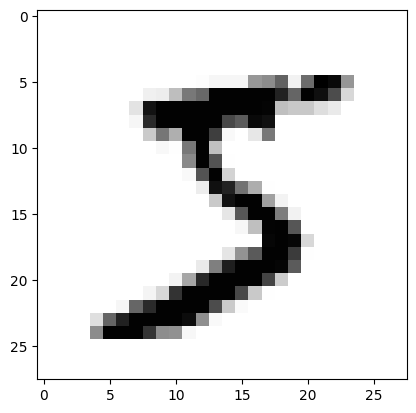

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap='Greys')
plt.show()

In [4]:
# 처음에 나오는 이미지의 자료를 화면에 출력

for x in x_train[0]:
    for i in x:
        print(f"{i:3d}",end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [5]:
# 데이터의 차원 변경
# 데이터 정규화

x_train = x_train.reshape(x_train.shape[0],28*28) # x_train.shape[0] 행의 개수
print(x_train.shape) # 60000 * 784

x_test = x_test.reshape(x_test.shape[0],28*28) # x_test.shape[0] 행의 개수
print(x_test.shape) # 20000 * 784


(60000, 784)
(10000, 784)


In [6]:
# 데이터 정규화

x_train = x_train.astype('float64')/255
x_test = x_test.astype('float64')/255

# x_test = x_test.reshape(x_test.shape[0],28*28).astype('float64')/255 # x_test.shape[0] 행의 개수



In [7]:
# y값의 클래스 확인

print('class : ' , y_train[0])

print(y_train[:10]) # 카테고리 데이터로 변형

from tensorflow.keras.utils import  to_categorical # one-hot encoding 과 같은 결과

y_train = to_categorical(y_train,10)
y_train[:10]

class :  5
[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
# 지금까지의 과정을 하나로 생성
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# mnist 데이터를 train과 test데이터로 load함
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# x_train과 x_test의 데이터를 차원변경 후 정규화
x_train = x_train.reshape(x_train.shape[0],28*28).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28*28).astype('float32')/255

# y의 값을 categori 데이터로 변환 -> one-hot 인코딩, -> to categorical(클래수,클래스갯수)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정
model_path= './data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(x_train, y_train, epochs=2000,
                 validation_split=0.25, batch_size=200, verbose=0,
                 callbacks=[early_stopping, checkpointer])

# 테스트 정확도 출력
print("Test accuracy : ", model.evaluate(x_test, y_test)[1])


Epoch 00001: val_loss improved from inf to 0.18437, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00002: val_loss improved from 0.18437 to 0.13536, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00003: val_loss improved from 0.13536 to 0.11412, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00004: val_loss improved from 0.11412 to 0.10130, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00005: val_loss improved from 0.10130 to 0.09132, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00006: val_loss improved from 0.09132 to 0.09067, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00007: val_loss improved from 0.09067 to 0.08214, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00008: val_loss did not improve from 0.08214

Epoch 00009: val_loss improved from 0.08214 to 0.08186, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00010: val_loss improved from 0.08186 to 0.08177, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00011: val_loss improved from 0.0817

In [ ]:
# %load tensor.py
# 딥러닝 모델 관련 모듈
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

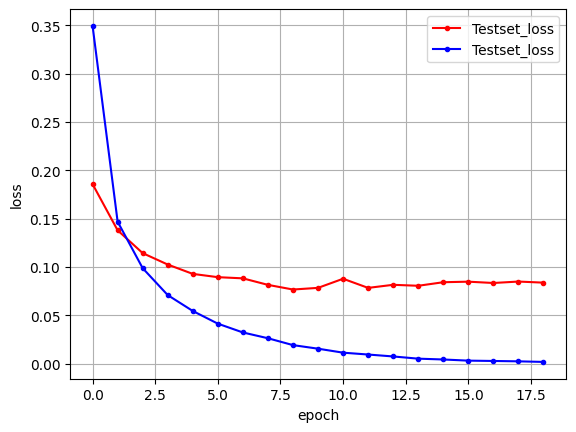

In [ ]:
# 실행된 결과를 그래프로 표현
y_vloss= hist.history['val_loss'] # 검증된 자료의 오차
y_loss= hist.history['loss'] # 학습셋의 오차

x_len = np.arange(len(y_loss)) # x 축
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Testset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()